# Deformation_LED_video

- Notebook to create animation for defense

# Imports

In [1]:
# Python standard library
import sys
import csv
import os

# Scientific computing
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation
import scipy.ndimage

# Program specific
sys.path.append('/home/prestonh/Desktop/Research/pore_stats/pore_stats/rp/')
sys.path.append('/home/prestonh/Desktop/Research/pore_stats/pore_stats/oi/')
import resistive_pulse as rp
import optical_imaging as oi
import oi_file


# Jupyter
from IPython.display import HTML

## Load data

In [2]:
date = '8-23-2017/'
particle = '293-T/'
channel = '15-30-15_3/'
file_index = '2/'

base_path = '/home/prestonh/Desktop/Research/cancer_cells/data/'

oi_vid_file_path = base_path + date + particle + channel + 'oi/bin/test_camera_' + file_index.replace('/','')
oi_events_file_path = base_path + date + particle + channel + 'oi/events/test_camera_' + file_index.replace('/','') + '_events' + '.json'

In [3]:
# Load video
res_x = 512
res_y = 288
oi_fps = 100000
exposure = 0.5
oi_vid = oi_file.Video(oi_vid_file_path, res_x, res_y, oi_fps, exposure)

# Load events
oi_events = oi_file.open_event_file_json(oi_events_file_path)

print 'loaded', len(oi_events), 'oi events'

/home/prestonh/Desktop/Research/pore_stats/pore_stats/oi/optical_imaging.py:63: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pixels != None:


loaded 1078 oi events


## Load ellipses

In [4]:
oi_ellipse_base_path = '/home/prestonh/Desktop/Research/cancer_cells/analysis/data/'
oi_ellipse_path = oi_ellipse_base_path + date + particle + channel + file_index + 'ellipses'

ellipsess = []


with open(oi_ellipse_path, 'r') as file_handle:
    file_reader = csv.reader(file_handle, delimiter = '\t')
    
    # Skip header
    header_length = 2
    for i in range(header_length):
        next(file_reader)
        
        
    for row in file_reader:
        
        if row[0] == 'event #':
            # New event
            ellipsess.append([])
            continue
            
        else:
            ellipse = []
            for ele in row:
                try:
                    ellipse.append(float(ele))
                except:
                    ellipse.append(0)
                    
            ellipsess[-1].append(ellipse)

## Filter

In [5]:
# Load keep indices
filter_file_path = oi_ellipse_base_path + date + particle + channel + file_index + 'filter'

with open(filter_file_path, 'r') as filter_file_handle:
    filter_file_reader = csv.reader(filter_file_handle, delimiter = '\t')
    for row in filter_file_reader:
        if row[0] == 'events':
            keep_indices = [int(ele) for ele in row[1:]]

print 'loaded keep indices (', len(keep_indices), 'events total):\n', keep_indices

loaded keep indices ( 501 events total):
[2, 5, 6, 8, 11, 13, 19, 22, 24, 25, 26, 30, 32, 34, 38, 39, 40, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 70, 71, 72, 74, 76, 80, 81, 85, 86, 88, 91, 92, 96, 97, 98, 100, 105, 106, 108, 110, 115, 118, 119, 120, 127, 129, 131, 132, 134, 136, 138, 139, 140, 142, 145, 147, 148, 153, 157, 159, 163, 167, 168, 171, 173, 178, 184, 185, 187, 194, 195, 198, 199, 207, 208, 210, 211, 212, 218, 220, 222, 223, 224, 225, 228, 232, 236, 240, 243, 246, 247, 250, 254, 255, 256, 257, 258, 263, 264, 265, 269, 271, 277, 278, 279, 280, 281, 284, 286, 287, 291, 293, 294, 295, 296, 297, 298, 299, 304, 305, 307, 311, 314, 315, 317, 318, 319, 322, 326, 327, 329, 330, 331, 332, 334, 336, 337, 343, 347, 348, 350, 352, 353, 354, 356, 361, 362, 364, 367, 368, 369, 371, 372, 373, 374, 377, 381, 383, 384, 385, 386, 389, 390, 392, 394, 395, 396, 397, 398, 400, 405, 406, 407, 409, 411, 413, 415, 416, 417, 418, 420, 421, 427, 430, 431, 432, 434, 43

In [46]:
for i in range(len(ellipsess)):
    ellipse = ellipsess[i][3]
    radius = np.sqrt(ellipse[3]*ellipse[4])
    print keep_indices[i], radius

2 14.9459932197
5 11.2714452469
6 12.7905340388
8 14.020231852
11 11.6056863819
13 14.3545962829
19 14.5614185136
22 10.5170637187
24 11.9003331363
25 11.8396991914
26 9.52245657367
30 14.6729319872
32 8.69747306116
34 13.374227113
38 11.7501895278
39 12.9122501497
40 11.5498085524
43 14.0794520589
44 14.4865266832
47 12.7237696488
48 12.9183445933
49 13.8477420057
50 12.3857488395
51 11.4821087354
52 12.3559625271
53 10.4169512879
54 12.6146505619
55 14.675711147
56 13.6386289651
59 12.9685504354
60 12.1182755631
61 14.3022226964
62 11.405423067
63 13.4173716762
64 13.1556440734
70 13.433242303
71 12.9969778724
72 14.0029319767
74 15.4493578942
76 11.2516253567
80 11.1462420794
81 14.4005936246
85 12.2390943934
86 11.0255666413
88 12.7066379072
91 13.8547369276
92 14.2709151634
96 12.293444166
97 13.6491549564
98 10.7957840314
100 10.3722273541
105 11.3073624561
106 13.6956428936
108 11.8887705856
110 11.6951573141
115 12.4992248344
118 11.9731497373
119 11.0726730012
120 12.929195129

In [51]:
print np.where(np.array(keep_indices) == 348)

(array([154]),)


In [6]:
filtered_oi_events = [oi_events[i] for i in range(len(oi_events)) if i in keep_indices]
filtered_ellipsess = [ellipsess[i] for i in range(len(ellipsess)) if i in keep_indices]

oi_events = filtered_oi_events
ellipsess = filtered_ellipsess

## Create stage

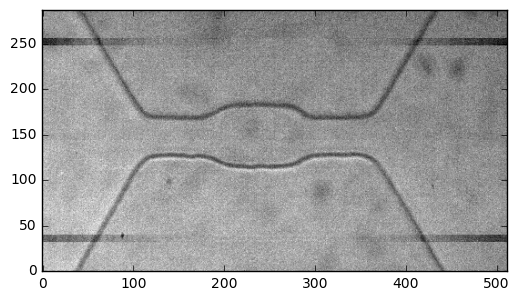

In [7]:
template_index = 100
template_frame = oi_vid.get_frame(template_index)

plt.imshow(template_frame, cmap = 'gray', origin = 'lower')
plt.show()

[-0.  1.]


/home/prestonh/Desktop/Research/pore_stats/pore_stats/oi/optical_imaging.py:429: RuntimeWarning: divide by zero encountered in double_scalars
  plt.plot([x, x + image_height/(self._norm_y[1]/self._norm_y[0])], [0, image_height], ls = '--', color = 'yellow')


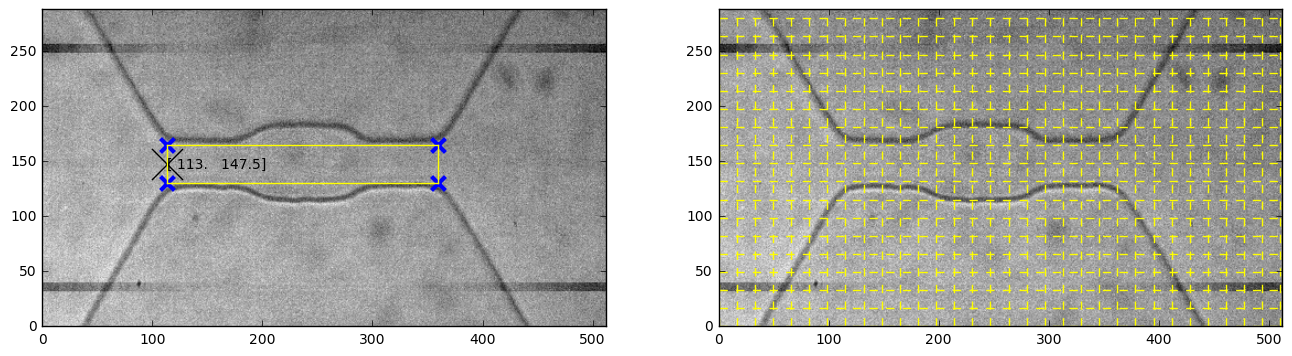

In [8]:
reload(oi)
template_frame = oi_vid.get_frame(template_index)
c0 = [113,165]
c1 = [113,130]
c2 = [360,130]
c3 = [360,165]
oi_stage = oi.Stage(template_frame, c0, c1, c2, c3)
oi_stage.plot_stage()

## Image augmenting functions

In [9]:
def crop_frame(frame, px, py, crop_distance):    
    x0 = int(px - crop_distance)
    x1 = int(px + crop_distance)
    y0 = int(py - crop_distance)
    y1 = int(py + crop_distance)
    cropped_frame = np.copy(frame)[y0:y1, x0:x1]
    
    return cropped_frame
    

preprocessing_steps = []






        


def preprocess_fit_ellipse(raw_frame, raw_template_frame, detection, debug = 'none'):

    
    
    
    # Refresh list
    del preprocessing_steps[:]

    

    
    #################################
    # Copy
    #################################
    
    
    
    preprocessing_steps.append(['copy'])

    processed_template_frame = np.copy(raw_template_frame)
    processed_frame = np.copy(raw_frame)
    

    if debug == 'all':
        print 'copy'
        plot_all(processed_frame, raw_frame)
        
        
    #################################
    # Crop
    #################################
    
    crop_distance = 30
    
    preprocessing_steps.append(['crop'] + [crop_distance])

    processed_frame = crop_frame(processed_frame, detection._px, detection._py, crop_distance)
    processed_template_frame = crop_frame(processed_template_frame, detection._px, detection._py, crop_distance)
    frame = np.copy(processed_frame)

    if debug == 'all':
        print 'crop'
        plot_all(processed_frame, frame)
        
        




    #################################
    # Blur
    #################################


    blur_kernel = (17,17)    # 19
    preprocessing_steps.append(['gaussian blur', blur_kernel])

    
    processed_frame = cv2.GaussianBlur(processed_frame, blur_kernel, 0)
    processed_template_frame = cv2.GaussianBlur(processed_template_frame, blur_kernel, 0)
    


    if debug == 'all':
        print 'gaussian blur', blur_kernel
        plot_all(processed_frame, frame)
    
    

        
        

        
    #################################
    # Processed-template Negative
    #################################

    
    
    preprocessing_steps.append(['processed-template negative'])

    processed_frame = processed_template_frame - processed_frame


    if debug == 'all':
        print 'processed-template negative'
        plot_all(processed_frame, frame)
    

        

    #################################
    # Abs Negative
    #################################
    '''
        
    preprocessing_steps.append(['abs negative'])

    processed_frame = np.abs(processed_template_frame - processed_frame)


    if debug == 'all':
        print 'abs negative'
        plot_all(processed_frame, frame)
    '''
    

    

    
    

    #################################
    # Gradient
    #################################
    
    preprocessing_steps.append(['gradient'])

    processed_frame = cv2.Laplacian(processed_frame, cv2.CV_64F)



    if debug == 'all':
        print 'gradient'
        plot_all(processed_frame, frame)
        
    #################################
    # Inversion
    #################################
    
    preprocessing_steps.append(['inversion'])

    processed_frame = 1-processed_frame



    if debug == 'all':
        print 'inversion'
        plot_all(processed_frame, frame)
    
    
     

    

    #################################
    # Adaptive thresholding
    #################################
    '''
    threshold_ratio = 0.7
    
    threshold = np.max(processed_frame) - (np.max(processed_frame) - np.min(processed_frame))*threshold_ratio
    
    preprocessing_steps.append(['pixel intensity adaptive threshold', threshold_ratio])


    processed_frame[processed_frame > threshold] = 1
    processed_frame[processed_frame <= threshold] = 0
    processed_frame = processed_frame.astype(int)




    if debug == 'all':
        print 'adaptive threshold'
        plot_all(processed_frame, frame)
    '''

    
    #################################
    # Rescale
    #################################
    
    preprocessing_steps.append(['rescale'])

    processed_frame = (processed_frame - np.min(processed_frame))/(np.max(processed_frame) - np.min(processed_frame))

    

    if debug == 'all':
        print 'rescale'
        plot_all(processed_frame, frame)
    
    
    
    
    ##################################
    # Static thresholding
    ##################################
    
    '''
    threshold = .555  # .5
    
    preprocessing_steps.append(['pixel intensity threshold', threshold])


    processed_frame[processed_frame > threshold] = 1
    processed_frame[processed_frame <= threshold] = 0
    processed_frame = processed_frame.astype(int)




    if debug == 'all':
        print 'static threshold', threshold
        plot_all(processed_frame, frame)
    '''

    
    
    ##################################
    # Adaptive thresholding histogram derivative
    ##################################
    
    sigma = 3
    threshold_factor = 3.
    preprocessing_steps.append(['adaptive thresholding histogram derivative, sigma = ', sigma, 'threshold_factor = ', threshold_factor])

    
            
    total_bins = 100

    counts, bins = np.histogram(processed_frame, bins = 100)

    
    smoothed_counts = scipy.ndimage.filters.gaussian_filter(counts, sigma = 3)


    derivative_smoothed_counts = np.gradient(smoothed_counts)


    derivative_threshold = np.abs(np.min(derivative_smoothed_counts)/threshold_factor)

    for i in range(len(derivative_smoothed_counts)):
        if np.abs(derivative_smoothed_counts[-1-i]) > derivative_threshold:
            index = -1-i
            break
            
    threshold = (bins[index] + bins[index-1])/2.

    processed_frame[processed_frame > threshold] = 1
    processed_frame[processed_frame <= threshold] = 0
    processed_frame = processed_frame.astype(int)
    
    if debug == 'all':
        print 'adaptive thresholding histogram derivative, sigma = ', sigma, 'derivative threshold = half max'
        plot_all(processed_frame, frame)
    


    #################################
    # Erode subtraction
    #################################
    '''
    iterations = 1
    preprocessing_steps.append(['erode subtraction, iterations = ', iterations])


    processed_frame = processed_frame - scipy.ndimage.morphology.binary_erosion(processed_frame, iterations = 1)




    if debug == 'all':
        print 'erode subtraction'
        plot_all(processed_frame, frame)
    '''



    
    

    #################################    
    # Get largest cluster
    #################################
    '''
    preprocessing_steps.append(['clustering (retain largest cluster)'])


    clusters = oi.find_clusters_percentage_based(processed_frame, np.zeros((processed_frame.shape[0], processed_frame.shape[1])), diag = True)
    largest_cluster = sorted(clusters, key = lambda x: len(x))[-1]
    processed_frame = np.zeros(processed_frame.shape, dtype = np.uint8)
    for pixel in largest_cluster:
        processed_frame[pixel[0], pixel[1]] = 1





    if debug == 'all':
        print 'cluster'
        plot_all(processed_frame, frame)
    '''

    
    #################################    
    # Percentage Based Clustering
    #################################
    '''percentage_of_largest = .15
    preprocessing_steps.append(['percentage based clustering = ', str(percentage_of_largest)])


    clusters = oi.find_clusters_percentage_based(processed_frame, np.zeros((processed_frame.shape[0], processed_frame.shape[1])), diag = True)

    largest_cluster = sorted(clusters, key = lambda x: len(x))[-1]

    cluster_threshold =  int(len(largest_cluster) * percentage_of_largest)
    clusters = oi.find_clusters_percentage_based(processed_frame, np.zeros((processed_frame.shape[0], processed_frame.shape[1])), diag = True, cluster_threshold = cluster_threshold)
    
    processed_frame = np.zeros(processed_frame.shape, dtype = np.uint8)
    for cluster in clusters:
        for pixel in cluster:
            processed_frame[pixel[0], pixel[1]] = 1
            
    if debug == 'all':
        print 'percentage based cluster threshold', percentage_of_largest
        plot_all(processed_frame, frame)
    '''
    
    #################################    
    # Cluster filtering
    #################################
    
    
    cluster_threshold = 50
    preprocessing_steps.append(['cluster filtering, threshold = ', str(cluster_threshold)])


    clusters = oi.find_clusters_percentage_based(processed_frame, np.zeros((processed_frame.shape[0], processed_frame.shape[1])), diag = True, cluster_threshold = cluster_threshold)
    
    processed_frame = np.zeros(processed_frame.shape, dtype = np.uint8)
    for cluster in clusters:
        for pixel in cluster:
            processed_frame[pixel[0], pixel[1]] = 1





    if debug == 'all':
        print 'cluster threshold', cluster_threshold
        plot_all(processed_frame, frame)
    
    
    
    
    #################################
    # Pad (numpy)
    #################################
    
    
    pad_width = 20
    #processing_steps.append('pad, pad width = ', pad_width)
    
    processed_frame = np.lib.pad(processed_frame, pad_width, 'constant')
    
    
    if debug == 'all':
        #print 'pad, width = ', pad_width
        plot_all(processed_frame, frame)
    
    
    #################################
    # Morphological closing (opencv)
    #################################
    
    morph_kernel_size = (45,45) #15
    preprocessing_steps.append(['morphological closing, kernel = ', morph_kernel_size])

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, morph_kernel_size)
    processed_frame = cv2.morphologyEx(np.array(processed_frame, dtype = np.uint8), cv2.MORPH_CLOSE, kernel)


    if debug == 'all':
        print 'morphological closing'
        plot_all(processed_frame, frame)
    
    
    
    #################################
    # Unpad (numpy)
    #################################
    
    processed_frame = processed_frame[pad_width:-pad_width, pad_width:-pad_width]
    
    
    
    
    
    if debug == 'all':
        #print 'rescale'
        plot_all(processed_frame, frame)
     
    
    
    
    
    
    #################################
    # Morphological closing (scipy)
    #################################
    '''
    processed_frame = scipy.ndimage.morphology.binary_closing(processed_frame, structure = np.ones((35,35)))
    
    if debug == 'all':
        print 'morphological closing (scipy)'
        plot_all(processed_frame, frame)
    '''


    #################################
    # Erode subtraction
    #################################
    
    iterations = 5
    preprocessing_steps.append(['erosion subtraction, iterations = ', iterations])



    processed_frame = processed_frame - scipy.ndimage.morphology.binary_erosion(processed_frame, iterations = iterations)


    if debug == 'all':
        print 'erode subtraction'
        plot_all(processed_frame, frame)
    
        
        
        
        
    
    
        
        
        
    
    #################################
    # Fill holes
    #################################
    
    '''
    preprocessing_steps.append(['fill holes'])

    processed_frame = np.array(scipy.ndimage.binary_fill_holes(processed_frame), dtype = np.uint8)

    print processed_frame.dtype


    if debug == 'all':
        print 'fill holes'
        plot_all(processed_frame, frame)
    '''  
        
    #################################
    # Dilate subtraction
    #################################
    '''
    iterations = 3
    preprocessing_steps.append(['dilation subtraction, iterations = ', iterations])

    processed_frame = scipy.ndimage.binary_dilation(processed_frame) - processed_frame


    if debug == 'all':
        print 'dilate subtraction'
        plot_all(processed_frame, frame)
    
    '''
    
    
    
        
        
        
    
 


    ###################################
    # Fit ellipse
    ###################################


    cell_pixels = np.where(processed_frame == 1)

    ellipse = oi.fit_ellipse(cell_pixels[1], cell_pixels[0])

    # Center
    ellipse_center = oi.get_ellipse_center(ellipse)
    ellipse_center_adjusted = [ellipse_center[0] + detection._px - crop_distance, ellipse_center[1] + detection._py - crop_distance]

    # Axes
    ellipse_axes_lengths = oi.get_ellipse_axes_lengths(ellipse)
    
    # Angle
    ellipse_angle = oi.get_ellipse_angle(ellipse)

    
    
    if debug != 'none':
        # Create perimeter line
        ellipse_points = np.empty((100,2))
        for i in range(100):
            angle = i*2*np.pi/99.
            x = ellipse_axes_lengths[0]*np.cos(angle)
            y = ellipse_axes_lengths[1]*np.sin(angle)
            ellipse_points[i,0] = ellipse_center[0] + np.cos(ellipse_angle)*x + np.sin(ellipse_angle)*y
            ellipse_points[i,1] = ellipse_center[1] + np.sin(ellipse_angle)*x - np.cos(ellipse_angle)*y

        # Turn pixels green
        green_processed_frame = np.zeros((processed_frame.shape[0], processed_frame.shape[1], 3))
        green_processed_frame[:,:,1] = processed_frame

        # Begin plot
        fig, axes = plt.subplots(1,3,figsize = (12,3))
        
        
        # Axes 0
        plt.sca(axes[0])
        plt.imshow(frame, cmap = 'gray', origin = 'lower', interpolation = 'none')
        plt.xlim(0, processed_frame.shape[1])
        plt.ylim(0, processed_frame.shape[0])

        
        # Axes 1
        plt.sca(axes[1])
        
        plt.imshow(frame, cmap = 'gray', origin = 'lower', interpolation = 'none')
        plt.imshow(green_processed_frame, alpha = .15, origin = 'lower', interpolation = 'none')
        #plt.plot(ellipse_points[:,0], ellipse_points[:,1], lw = 3, c = 'red')

        #plt.scatter(ellipse_center[0], ellipse_center[1], marker = 'x', lw = 5, color = 'red', s = 50)
        
        plt.xlim(0, processed_frame.shape[1])
        plt.ylim(0, processed_frame.shape[0])
        
        
        # Axes 2
        plt.sca(axes[2])
        
        plt.imshow(frame, cmap = 'gray', origin = 'lower', interpolation = 'none')
        #plt.imshow(processed_frame, cmap = 'gray', origin = 'lower', interpolation = 'none')
        plt.imshow(green_processed_frame, alpha = .15, origin = 'lower', interpolation = 'none')
        plt.plot(ellipse_points[:,0], ellipse_points[:,1], lw = 3, c = 'red')

        plt.scatter(ellipse_center[0], ellipse_center[1], marker = 'x', c = 'red', lw = 3, s = 20)
        
        
        ellipse_axis_a = [ellipse_axes_lengths[0]*np.cos(ellipse_angle), ellipse_axes_lengths[0]*np.sin(ellipse_angle)]
        ellipse_axis_b = [ellipse_axes_lengths[1]*np.sin(ellipse_angle), -ellipse_axes_lengths[1]*np.cos(ellipse_angle)]

        
        ax0 = ellipse_center[0]
        ax1 = ax0 + ellipse_axis_a[0]
        ay0 = ellipse_center[1]
        ay1 = ay0 + ellipse_axis_a[1]
        
        bx0 = ellipse_center[0]
        bx1 = bx0 + ellipse_axis_b[0]
        by0 = ellipse_center[1]
        by1 = by0 + ellipse_axis_b[1]
        
        plt.plot([ax0, ax1], [ay0, ay1], lw = 3, c = 'red')
        plt.plot([bx0, bx1], [by0, by1], lw = 3, c = 'red')
        
        plt.text((ax0+ax1)/2., (ay0+ay1)/2., 'a', color = 'red', size = 20, ha = 'left', va = 'bottom')
        plt.text((bx0+bx1)/2., (by0+by1)/2., 'b', color = 'red', size = 20, ha = 'left', va = 'bottom')
        
        plt.text(1, 0.2, r'$|a|=$'+str(round(ellipse_axes_lengths[0],3)), transform=plt.gca().transAxes, ha = 'right', va = 'bottom', size = 12, color = 'red')
        plt.text(1, 0.1, r'$|b|=$'+str(round(ellipse_axes_lengths[1],3)), transform=plt.gca().transAxes, ha = 'right', va = 'bottom', size = 12, color = 'red')

        plt.text(1, 0, r'$\theta=$'+str(round(ellipse_angle*180./np.pi,3)), transform=plt.gca().transAxes, ha = 'right', va = 'bottom', size = 12, color = 'red')
        
        
        
        plt.xlim(0, processed_frame.shape[1])
        plt.ylim(0, processed_frame.shape[0])
        
        plt.grid()
                
        plt.show()
        
        
    return [ellipse_center_adjusted[0], ellipse_center_adjusted[1], ellipse_axes_lengths[0], ellipse_axes_lengths[1], ellipse_angle]
  


def preprocess_get_green(raw_frame, raw_template_frame, detection, debug = 'none'):

    
    
    
    # Refresh list
    del preprocessing_steps[:]

    

    
    #################################
    # Copy
    #################################
    
    
    
    preprocessing_steps.append(['copy'])

    processed_template_frame = np.copy(raw_template_frame)
    processed_frame = np.copy(raw_frame)
    

    if debug == 'all':
        print 'copy'
        plot_all(processed_frame, raw_frame)
        
        
    #################################
    # Crop
    #################################
    
    crop_distance = 30
    
    preprocessing_steps.append(['crop'] + [crop_distance])

    processed_frame = crop_frame(processed_frame, detection._px, detection._py, crop_distance)
    processed_template_frame = crop_frame(processed_template_frame, detection._px, detection._py, crop_distance)
    frame = np.copy(processed_frame)

    if debug == 'all':
        print 'crop'
        plot_all(processed_frame, frame)
        
        




    #################################
    # Blur
    #################################


    blur_kernel = (17,17)    # 19
    preprocessing_steps.append(['gaussian blur', blur_kernel])

    
    processed_frame = cv2.GaussianBlur(processed_frame, blur_kernel, 0)
    processed_template_frame = cv2.GaussianBlur(processed_template_frame, blur_kernel, 0)
    


    if debug == 'all':
        print 'gaussian blur', blur_kernel
        plot_all(processed_frame, frame)
    
    

        
        

        
    #################################
    # Processed-template Negative
    #################################

    
    
    preprocessing_steps.append(['processed-template negative'])

    processed_frame = processed_template_frame - processed_frame


    if debug == 'all':
        print 'processed-template negative'
        plot_all(processed_frame, frame)
    

        

    #################################
    # Abs Negative
    #################################
    '''
        
    preprocessing_steps.append(['abs negative'])

    processed_frame = np.abs(processed_template_frame - processed_frame)


    if debug == 'all':
        print 'abs negative'
        plot_all(processed_frame, frame)
    '''
    

    

    
    

    #################################
    # Gradient
    #################################
    
    preprocessing_steps.append(['gradient'])

    processed_frame = cv2.Laplacian(processed_frame, cv2.CV_64F)



    if debug == 'all':
        print 'gradient'
        plot_all(processed_frame, frame)
        
    #################################
    # Inversion
    #################################
    
    preprocessing_steps.append(['inversion'])

    processed_frame = 1-processed_frame



    if debug == 'all':
        print 'inversion'
        plot_all(processed_frame, frame)
    
    
     

    

    #################################
    # Adaptive thresholding
    #################################
    '''
    threshold_ratio = 0.7
    
    threshold = np.max(processed_frame) - (np.max(processed_frame) - np.min(processed_frame))*threshold_ratio
    
    preprocessing_steps.append(['pixel intensity adaptive threshold', threshold_ratio])


    processed_frame[processed_frame > threshold] = 1
    processed_frame[processed_frame <= threshold] = 0
    processed_frame = processed_frame.astype(int)




    if debug == 'all':
        print 'adaptive threshold'
        plot_all(processed_frame, frame)
    '''

    
    #################################
    # Rescale
    #################################
    
    preprocessing_steps.append(['rescale'])

    processed_frame = (processed_frame - np.min(processed_frame))/(np.max(processed_frame) - np.min(processed_frame))

    

    if debug == 'all':
        print 'rescale'
        plot_all(processed_frame, frame)
    
    
    
    
    ##################################
    # Static thresholding
    ##################################
    
    '''
    threshold = .555  # .5
    
    preprocessing_steps.append(['pixel intensity threshold', threshold])


    processed_frame[processed_frame > threshold] = 1
    processed_frame[processed_frame <= threshold] = 0
    processed_frame = processed_frame.astype(int)




    if debug == 'all':
        print 'static threshold', threshold
        plot_all(processed_frame, frame)
    '''

    
    
    ##################################
    # Adaptive thresholding histogram derivative
    ##################################
    
    sigma = 3
    threshold_factor = 3.
    preprocessing_steps.append(['adaptive thresholding histogram derivative, sigma = ', sigma, 'threshold_factor = ', threshold_factor])

    
            
    total_bins = 100

    counts, bins = np.histogram(processed_frame, bins = 100)

    
    smoothed_counts = scipy.ndimage.filters.gaussian_filter(counts, sigma = 3)


    derivative_smoothed_counts = np.gradient(smoothed_counts)


    derivative_threshold = np.abs(np.min(derivative_smoothed_counts)/threshold_factor)

    for i in range(len(derivative_smoothed_counts)):
        if np.abs(derivative_smoothed_counts[-1-i]) > derivative_threshold:
            index = -1-i
            break
            
    threshold = (bins[index] + bins[index-1])/2.

    processed_frame[processed_frame > threshold] = 1
    processed_frame[processed_frame <= threshold] = 0
    processed_frame = processed_frame.astype(int)
    
    if debug == 'all':
        print 'adaptive thresholding histogram derivative, sigma = ', sigma, 'derivative threshold = half max'
        plot_all(processed_frame, frame)
    


    #################################
    # Erode subtraction
    #################################
    '''
    iterations = 1
    preprocessing_steps.append(['erode subtraction, iterations = ', iterations])


    processed_frame = processed_frame - scipy.ndimage.morphology.binary_erosion(processed_frame, iterations = 1)




    if debug == 'all':
        print 'erode subtraction'
        plot_all(processed_frame, frame)
    '''



    
    

    #################################    
    # Get largest cluster
    #################################
    '''
    preprocessing_steps.append(['clustering (retain largest cluster)'])


    clusters = oi.find_clusters_percentage_based(processed_frame, np.zeros((processed_frame.shape[0], processed_frame.shape[1])), diag = True)
    largest_cluster = sorted(clusters, key = lambda x: len(x))[-1]
    processed_frame = np.zeros(processed_frame.shape, dtype = np.uint8)
    for pixel in largest_cluster:
        processed_frame[pixel[0], pixel[1]] = 1





    if debug == 'all':
        print 'cluster'
        plot_all(processed_frame, frame)
    '''

    
    #################################    
    # Percentage Based Clustering
    #################################
    '''percentage_of_largest = .15
    preprocessing_steps.append(['percentage based clustering = ', str(percentage_of_largest)])


    clusters = oi.find_clusters_percentage_based(processed_frame, np.zeros((processed_frame.shape[0], processed_frame.shape[1])), diag = True)

    largest_cluster = sorted(clusters, key = lambda x: len(x))[-1]

    cluster_threshold =  int(len(largest_cluster) * percentage_of_largest)
    clusters = oi.find_clusters_percentage_based(processed_frame, np.zeros((processed_frame.shape[0], processed_frame.shape[1])), diag = True, cluster_threshold = cluster_threshold)
    
    processed_frame = np.zeros(processed_frame.shape, dtype = np.uint8)
    for cluster in clusters:
        for pixel in cluster:
            processed_frame[pixel[0], pixel[1]] = 1
            
    if debug == 'all':
        print 'percentage based cluster threshold', percentage_of_largest
        plot_all(processed_frame, frame)
    '''
    
    #################################    
    # Cluster filtering
    #################################
    
    
    cluster_threshold = 50
    preprocessing_steps.append(['cluster filtering, threshold = ', str(cluster_threshold)])


    clusters = oi.find_clusters_percentage_based(processed_frame, np.zeros((processed_frame.shape[0], processed_frame.shape[1])), diag = True, cluster_threshold = cluster_threshold)
    
    processed_frame = np.zeros(processed_frame.shape, dtype = np.uint8)
    for cluster in clusters:
        for pixel in cluster:
            processed_frame[pixel[0], pixel[1]] = 1





    if debug == 'all':
        print 'cluster threshold', cluster_threshold
        plot_all(processed_frame, frame)
    
    
    
    
    #################################
    # Pad (numpy)
    #################################
    
    
    pad_width = 20
    #processing_steps.append('pad, pad width = ', pad_width)
    
    processed_frame = np.lib.pad(processed_frame, pad_width, 'constant')
    
    
    if debug == 'all':
        #print 'pad, width = ', pad_width
        plot_all(processed_frame, frame)
    
    
    #################################
    # Morphological closing (opencv)
    #################################
    
    morph_kernel_size = (45,45) #15
    preprocessing_steps.append(['morphological closing, kernel = ', morph_kernel_size])

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, morph_kernel_size)
    processed_frame = cv2.morphologyEx(np.array(processed_frame, dtype = np.uint8), cv2.MORPH_CLOSE, kernel)


    if debug == 'all':
        print 'morphological closing'
        plot_all(processed_frame, frame)
    
    
    
    #################################
    # Unpad (numpy)
    #################################
    
    processed_frame = processed_frame[pad_width:-pad_width, pad_width:-pad_width]
    
    
    
    
    
    if debug == 'all':
        #print 'rescale'
        plot_all(processed_frame, frame)
     
    
    
    
    
    
    #################################
    # Morphological closing (scipy)
    #################################
    '''
    processed_frame = scipy.ndimage.morphology.binary_closing(processed_frame, structure = np.ones((35,35)))
    
    if debug == 'all':
        print 'morphological closing (scipy)'
        plot_all(processed_frame, frame)
    '''


    #################################
    # Erode subtraction
    #################################
    
    iterations = 5
    preprocessing_steps.append(['erosion subtraction, iterations = ', iterations])



    processed_frame = processed_frame - scipy.ndimage.morphology.binary_erosion(processed_frame, iterations = iterations)


    if debug == 'all':
        print 'erode subtraction'
        plot_all(processed_frame, frame)
    
        
        
        
        
    
    
        
        
        
    
    #################################
    # Fill holes
    #################################
    
    '''
    preprocessing_steps.append(['fill holes'])

    processed_frame = np.array(scipy.ndimage.binary_fill_holes(processed_frame), dtype = np.uint8)

    print processed_frame.dtype


    if debug == 'all':
        print 'fill holes'
        plot_all(processed_frame, frame)
    '''  
        
    #################################
    # Dilate subtraction
    #################################
    '''
    iterations = 3
    preprocessing_steps.append(['dilation subtraction, iterations = ', iterations])

    processed_frame = scipy.ndimage.binary_dilation(processed_frame) - processed_frame


    if debug == 'all':
        print 'dilate subtraction'
        plot_all(processed_frame, frame)
    
    '''
    
    
    
        
        
        
    
 


    ###################################
    # Fit ellipse
    ###################################


    cell_pixels = np.where(processed_frame == 1)

    ellipse = oi.fit_ellipse(cell_pixels[1], cell_pixels[0])

    # Center
    ellipse_center = oi.get_ellipse_center(ellipse)
    ellipse_center_adjusted = [ellipse_center[0] + detection._px - crop_distance, ellipse_center[1] + detection._py - crop_distance]

    # Axes
    ellipse_axes_lengths = oi.get_ellipse_axes_lengths(ellipse)
    
    # Angle
    ellipse_angle = oi.get_ellipse_angle(ellipse)

    
    
    if debug != 'none':
        # Create perimeter line
        ellipse_points = np.empty((100,2))
        for i in range(100):
            angle = i*2*np.pi/99.
            x = ellipse_axes_lengths[0]*np.cos(angle)
            y = ellipse_axes_lengths[1]*np.sin(angle)
            ellipse_points[i,0] = ellipse_center[0] + np.cos(ellipse_angle)*x + np.sin(ellipse_angle)*y
            ellipse_points[i,1] = ellipse_center[1] + np.sin(ellipse_angle)*x - np.cos(ellipse_angle)*y

        # Turn pixels green
        green_processed_frame = np.zeros((processed_frame.shape[0], processed_frame.shape[1], 3))
        green_processed_frame[:,:,1] = processed_frame

        # Begin plot
        fig, axes = plt.subplots(1,3,figsize = (12,3))
        
        
        # Axes 0
        plt.sca(axes[0])
        plt.imshow(frame, cmap = 'gray', origin = 'lower', interpolation = 'none')
        plt.xlim(0, processed_frame.shape[1])
        plt.ylim(0, processed_frame.shape[0])

        
        # Axes 1
        plt.sca(axes[1])
        
        plt.imshow(frame, cmap = 'gray', origin = 'lower', interpolation = 'none')
        plt.imshow(green_processed_frame, alpha = .15, origin = 'lower', interpolation = 'none')
        #plt.plot(ellipse_points[:,0], ellipse_points[:,1], lw = 3, c = 'red')

        #plt.scatter(ellipse_center[0], ellipse_center[1], marker = 'x', lw = 5, color = 'red', s = 50)
        
        plt.xlim(0, processed_frame.shape[1])
        plt.ylim(0, processed_frame.shape[0])
        
        
        # Axes 2
        plt.sca(axes[2])
        
        plt.imshow(frame, cmap = 'gray', origin = 'lower', interpolation = 'none')
        #plt.imshow(processed_frame, cmap = 'gray', origin = 'lower', interpolation = 'none')
        plt.imshow(green_processed_frame, alpha = .15, origin = 'lower', interpolation = 'none')
        plt.plot(ellipse_points[:,0], ellipse_points[:,1], lw = 3, c = 'red')

        plt.scatter(ellipse_center[0], ellipse_center[1], marker = 'x', c = 'red', lw = 3, s = 20)
        
        
        ellipse_axis_a = [ellipse_axes_lengths[0]*np.cos(ellipse_angle), ellipse_axes_lengths[0]*np.sin(ellipse_angle)]
        ellipse_axis_b = [ellipse_axes_lengths[1]*np.sin(ellipse_angle), -ellipse_axes_lengths[1]*np.cos(ellipse_angle)]

        
        ax0 = ellipse_center[0]
        ax1 = ax0 + ellipse_axis_a[0]
        ay0 = ellipse_center[1]
        ay1 = ay0 + ellipse_axis_a[1]
        
        bx0 = ellipse_center[0]
        bx1 = bx0 + ellipse_axis_b[0]
        by0 = ellipse_center[1]
        by1 = by0 + ellipse_axis_b[1]
        
        plt.plot([ax0, ax1], [ay0, ay1], lw = 3, c = 'red')
        plt.plot([bx0, bx1], [by0, by1], lw = 3, c = 'red')
        
        plt.text((ax0+ax1)/2., (ay0+ay1)/2., 'a', color = 'red', size = 20, ha = 'left', va = 'bottom')
        plt.text((bx0+bx1)/2., (by0+by1)/2., 'b', color = 'red', size = 20, ha = 'left', va = 'bottom')
        
        plt.text(1, 0.2, r'$|a|=$'+str(round(ellipse_axes_lengths[0],3)), transform=plt.gca().transAxes, ha = 'right', va = 'bottom', size = 12, color = 'red')
        plt.text(1, 0.1, r'$|b|=$'+str(round(ellipse_axes_lengths[1],3)), transform=plt.gca().transAxes, ha = 'right', va = 'bottom', size = 12, color = 'red')

        plt.text(1, 0, r'$\theta=$'+str(round(ellipse_angle*180./np.pi,3)), transform=plt.gca().transAxes, ha = 'right', va = 'bottom', size = 12, color = 'red')
        
        
        
        plt.xlim(0, processed_frame.shape[1])
        plt.ylim(0, processed_frame.shape[0])
        
        plt.grid()
                
        plt.show()
        
    
    green_pixels = np.where(processed_frame > 0)
    
    
    return green_pixels
        
    return [ellipse_center_adjusted[0], ellipse_center_adjusted[1], ellipse_axes_lengths[0], ellipse_axes_lengths[1], ellipse_angle]


## Select event

In [52]:
event_index = 154
oi_event = oi_events[154]
ellipses = ellipsess[154]

## Get relevant data

In [53]:
# Get first, last detection in event
i_i = int(ellipses[0][0])
i_f = int(ellipses[-1][0])

# Convert detection to time index
t_i = oi_event._detections[i_i]._tf
t_f = oi_event._detections[i_f]._tf

# Add an offset to the detection
left_offset = 5
right_offset = 5
t_i = t_i - left_offset
t_f = t_f + right_offset

# Constants for zoomed in views
zoom_offset = 45

## Create animation

In [100]:
# Set frames in animation

# Whole-view
frame_repeat = 3
frame_sequence = []
for i in range(t_i, t_f):
    frame_sequence += 3*[i]
    
    
# Zoom-view
zoom_frame_repeat = 3
zoom_frame_sequence = []
for i in range(0, len(ellipses)-2):
    zoom_frame_sequence += zoom_frame_repeat*[i]
    
# Ellipse-view
ellipse_frame_repeat = 9
ellipse_frame_sequence = []
for i in range(0, len(ellipses)-2):
    ellipse_frame_sequence += ellipse_frame_repeat*[i]
    
    
# Set lengths for range function in animation()
sequence_length = len(frame_sequence)
pause_1_length = 5
zoom_sequence_length = len(zoom_frame_sequence)
pause_2_length = 5
ellipses_sequence_length = len(ellipse_frame_sequence)

trans_0 = sequence_length
trans_1 = trans_0 + pause_1_length
trans_2 = trans_1 + zoom_sequence_length
trans_3 = trans_2 + pause_2_length
trans_4 = trans_3 + ellipses_sequence_length


def animate(index):
    ###########################################################################################
    # Whole view
    ###########################################################################################
    
    if index < trans_0:
        video_plot.set_data(oi_vid.get_frame(frame_sequence[index]))
        
        plt.gca().set_xlim(0, template_frame.shape[1])
        plt.gca().set_ylim(0, template_frame.shape[0])
        
    ###########################################################################################
    # Pause 1
    ###########################################################################################
    if (index >= trans_0) and (index < trans_1):
        pass
    
    
    ###########################################################################################
    # Zoomed-in view
    ###########################################################################################
    

    
    if (index >= trans_1) and (index < trans_2):
        # Get ellipse and time
        ellipse = ellipses[zoom_frame_sequence[index - trans_1]]
        
        i_detection = int(ellipse[0])
        tf = oi_event._detections[i_detection]._tf
        
        # Get plot frame
        frame = oi_vid.get_frame(tf)

        
        # Get ellipse parameters
        x = ellipse[1]
        y = ellipse[2]
        
        

            
        
        
        # Set data and limits
        video_plot.set_data(frame)
        #green_video_plot.set_data(green_frame)
        
        plt.gca().set_xlim(x-zoom_offset,x+zoom_offset)
        plt.gca().set_ylim(y-zoom_offset,y+zoom_offset)
        
        
    ###########################################################################################
    # Pause 2
    ###########################################################################################
    
    elif (index >= trans_2) and (index < trans_3):
        pass
        
        
    ###########################################################################################
    # Ellipse view
    ###########################################################################################
    
    
    elif (index >= trans_3) and (index < trans_4):        
        # Get ellipse and time
        ellipse = ellipses[ellipse_frame_sequence[index - trans_3]]
        
        i_detection = int(ellipse[0])
        tf = oi_event._detections[i_detection]._tf
        
        frame = oi_vid.get_frame(tf)
        
        # Get ellipse parameters
        x = ellipse[1]
        y = ellipse[2]
        
        xc, yc = oi_stage.get_channel_coordinates(x,y)
        xc = oi_stage.pixels_to_meters(xc)
        yc = oi_stage.pixels_to_meters(yc)
        
        a = ellipse[3]
        b = ellipse[4]
        
        angle = ellipse[5]
        
        
        # Get new ellipse to take pics
        new_ellipse = preprocess_fit_ellipse(frame, template_frame, oi_event._detections[i_detection])
        
        ellipse_x = new_ellipse[0]
        ellipse_y = new_ellipse[1]
        ellipse_a = new_ellipse[2]
        ellipse_b = new_ellipse[3]
        ellipse_angle = new_ellipse[4]
        
        ellipse_points = np.empty((100,2))
        for i in range(100):
            temp_angle = i*2*np.pi/99.
            temp_x = ellipse_a*np.cos(temp_angle)
            temp_y = ellipse_b*np.sin(temp_angle)
            ellipse_points[i,0] = ellipse_x + np.cos(ellipse_angle)*temp_x + np.sin(ellipse_angle)*temp_y
            ellipse_points[i,1] = ellipse_y + np.sin(ellipse_angle)*temp_x - np.cos(ellipse_angle)*temp_y
        
        
        # Set data and limits
        video_plot.set_data(oi_vid.get_frame(tf))
        
        event_center_plot.set_offsets([ellipse_x, ellipse_y])
        ellipse_perimiter_plot.set_data(ellipse_points[:,0], ellipse_points[:,1])
        ellipse_a_plot.set_data([ellipse_x, ellipse_x + ellipse_a*np.cos(ellipse_angle)],
                                [ellipse_y, ellipse_y + ellipse_a*np.sin(ellipse_angle)])
        ellipse_b_plot.set_data([ellipse_x, ellipse_x + ellipse_b*np.sin(ellipse_angle)],
                                [ellipse_y, ellipse_y - ellipse_b*np.cos(ellipse_angle)])
        
        ellipse_a_label_text.set_position((ellipse_x + (ellipse_a+5)*np.cos(ellipse_angle),\
                                          ellipse_y + (ellipse_a+5)*np.sin(ellipse_angle)))
        
        ellipse_b_label_text.set_position((ellipse_x + (ellipse_b+5)*np.sin(ellipse_angle),\
                                          ellipse_y + -(ellipse_b+5)*np.cos(ellipse_angle)))
        
        
        
        # Set text
        ellipse_a_text.set_text('a = ' + str(round(oi_stage.pixels_to_meters(ellipse_a),2)) + r'$ \mu$m')
        ellipse_b_text.set_text('b = ' + str(round(oi_stage.pixels_to_meters(ellipse_b),2)) + r'$ \mu$m')
        ellipse_aspect_text.set_text('a/b = ' + str(round(ellipse_a/ellipse_b, 2)))
        
        
        
        plt.gca().set_xlim(x-zoom_offset,x+zoom_offset)
        plt.gca().set_ylim(y-zoom_offset,y+zoom_offset)
    
        
        x_offset = -30
        y_offset = 5
        xpos = plt.gca().get_xlim()[1] + x_offset
        ypos1 = plt.gca().get_ylim()[0] + y_offset*3
        ypos2 = plt.gca().get_ylim()[0] + y_offset*2
        ypos3 = plt.gca().get_ylim()[0] + y_offset*1
        
        

        ellipse_a_text.set_position((xpos, ypos1))
        ellipse_b_text.set_position((xpos, ypos2))
        ellipse_aspect_text.set_position((xpos, ypos3))
        
        
            
        
    
    
# Set default plot
fig = plt.figure(figsize = ((8,6)))


video_plot = plt.imshow(template_frame, cmap = 'gray', origin = 'lower', interpolation = 'none')
green_video_plot = plt.imshow(np.empty((0,0,3)), origin = 'lower', interpolation = 'none', alpha = .3)

event_center_plot = plt.scatter([],[], marker = 'x', color = 'red', s = 100, lw = 5)
ellipse_perimiter_plot, = plt.plot([], [], color = 'red', lw = 3)
ellipse_plot, = plt.plot([], [], color = 'red', lw = 3)
ellipse_a_plot, = plt.plot([], [], color = 'red', lw = 3)
ellipse_b_plot, = plt.plot([], [], color = 'red', lw = 3)

ellipse_a_text  = plt.text(0,0,'', ha = 'left', va = 'bottom', color = 'red', size = 18)
ellipse_b_text = plt.text(0,0,'', ha = 'left', va = 'bottom', color = 'red', size = 18)
ellipse_aspect_text = plt.text(0,0,'', ha = 'left', va = 'bottom', color = 'red', size = 18)

ellipse_a_label_text  = plt.text(-50,-50,'a', ha = 'left', va = 'bottom', color = 'red', size = 16)
ellipse_b_label_text = plt.text(-50,-50,'b', ha = 'left', va = 'bottom', color = 'red', size = 16)

plt.xticks([])
plt.yticks([])

plt.gca().set_xlim(0, template_frame.shape[1])
plt.gca().set_ylim(0, template_frame.shape[0])




# Create animation
animation = matplotlib.animation.FuncAnimation(fig, animate, range(sequence_length + pause_1_length + zoom_sequence_length + pause_2_length + ellipses_sequence_length), interval = 200, blit = False)

animation.save('cell_deformation.mp4', dpi = 150)

In [96]:
HTML(animation.to_html5_video())

## Testing

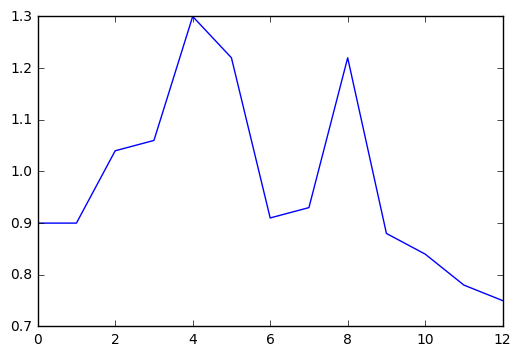

In [99]:
plt.plot([.9,.9,1.04,1.06,1.3,1.22,.91,.93,1.22,.88,.84,.78,.75])
plt.show()